# Fitting AUSF

The model requires the fitting of pig population dynamics and ASF disease dynamics. We first fit the population to ensure that the population returns to the carrying capacity

### Load Modules

In [1]:
using GpABC, Distances, Distributions, Plots, StatsBase, Printf
using DiffEqCallbacks, DifferentialEquations, LinearAlgebra
using DelimitedFiles, DataFrames, LinearAlgebra, SparseArrays


In [7]:
using QuadGK

In [9]:
include("/home/callum/ASF/Modules/ASF_input.jl");
include("/home/callum/ASF/Modules/ASF_model.jl");
#include("/home/callum/ASF/Modules/ASF_analysis.jl")

In [4]:
input_path = "/home/callum/ASF/Inputs/"; #path to model data

### Model

In [1243]:
input = ASF_Inputs.Model_Data(input_path, true); #loading the model input

┌ Info: Running with seasons
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:54
┌ Info: Watts Strogatz Small Worlds Network
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:60
┌ Info: Rho: 0.1
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:61
┌ Warning: Mean feral connectivity of 10.0
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:157
┌ Warning: Intra-group transmission of 0.3
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:177
┌ Warning: Inter-group transmission of 0.038
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:181
┌ Warning: Corpse infectivity of 0.75
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:185
┌ Warning: Immunity period of 7.0
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:189
┌ Warning: Deacy period of 7.0
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:193
┌ Info: 1000 Feral Groups
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:374
┌ Info: 0 Farm Populations
└ @ Ma

In [1244]:
const nt = input.Parameters.Populations.cum_sum[end] #total number of groups and farms
const nc = 5 #number of classes
const eqs = 11 #number of processes

const dc = sparse(zeros(nt*nc,nt*eqs))

#const _dc = zeros(nt*5,nt*10)

dc[0*nc*nt+1:nc*nt*eqs+nc:end] .= 1
dc[1*nc*nt+1:nc*nt*eqs+nc:end] .= -1
dc[2*nc*nt+1:nc*nt*eqs+nc:end] .= -1
dc[10*nc*nt+1:nc*nt*eqs+nc:end] .= 1

dc[2*nc*nt+2:nc*nt*eqs+nc:end] .= 1
dc[3*nc*nt+2:nc*nt*eqs+nc:end] .= -1
dc[4*nc*nt+2:nc*nt*eqs+nc:end] .= -1

dc[4*nc*nt+3:nc*nt*eqs+nc:end] .= 1
dc[5*nc*nt+3:nc*nt*eqs+nc:end] .= -1
dc[6*nc*nt+3:nc*nt*eqs+nc:end] .= -1
dc[7*nc*nt+3:nc*nt*eqs+nc:end] .= -1

dc[7*nc*nt+4:nc*nt*eqs+nc:end] .= 1
dc[8*nc*nt+4:nc*nt*eqs+nc:end] .= -1
dc[10*nc*nt+4:nc*nt*eqs+nc:end] .= -1


dc[5*nc*nt+5:nc*nt*eqs+nc:end] .= 1
dc[6*nc*nt+5:nc*nt*eqs+nc:end] .= 1
dc[9*nc*nt+5:nc*nt*eqs+nc:end] .= -1;

In [1245]:
function regular_c(du,u,p,t,counts,mark)  
    mul!(du,dc,counts)
    nothing
end

regular_c (generic function with 1 method)

In [1246]:

function run_analysis(sol)
   
        data = reduce(vcat,transpose.(sol.u))
        data[data .< 0 ] .= 0
   
        s_d = data[:,1:5:end]
        e_d = data[:,2:5:end]
        i_d = data[:,3:5:end]
        r_d = data[:,4:5:end]
        c_d = data[:,5:5:end]
 
        disease_total = e_d + i_d + c_d #classes with disease,
        disease_alive = e_d + i_d
 
        disease_free = s_d + r_d #classes without disease,
 
        disease_sum = sum(disease_total,dims=2)
        disease_alive_sum =  sum(disease_alive,dims=2)
        disease_free_sum = sum(disease_free,dims=2)
        population_sum = disease_alive_sum + disease_free_sum;
   
        return disease_sum, disease_alive_sum, disease_free_sum, population_sum
    end

run_analysis (generic function with 1 method)

In [1247]:
input = ASF_Inputs.Model_Data(input_path, true); #loading the model input
params = ASF_Model.convert(input.Parameters);

┌ Info: Running with seasons
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:54
┌ Info: Watts Strogatz Small Worlds Network
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:60
┌ Info: Rho: 0.1
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:61
┌ Warning: Mean feral connectivity of 10.0
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:157
┌ Warning: Intra-group transmission of 0.3
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:177
┌ Warning: Inter-group transmission of 0.038
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:181
┌ Warning: Corpse infectivity of 0.75
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:185
┌ Warning: Immunity period of 7.0
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:189
┌ Warning: Deacy period of 7.0
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:193
┌ Info: 1000 Feral Groups
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:374
┌ Info: 0 Farm Populations
└ @ Ma

In [1166]:
mean(sum(params[3], dims=1))

10.0

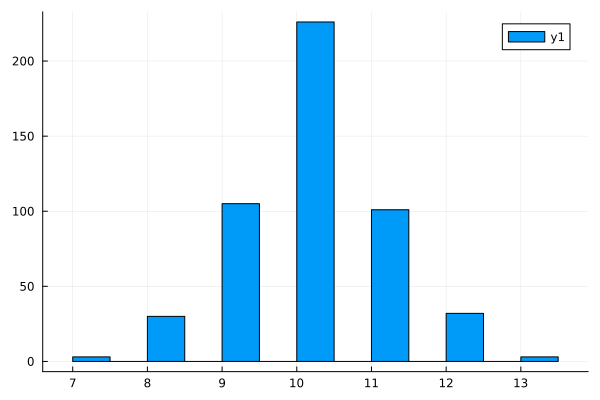

In [1167]:
histogram(sum(params[3], dims=1)')

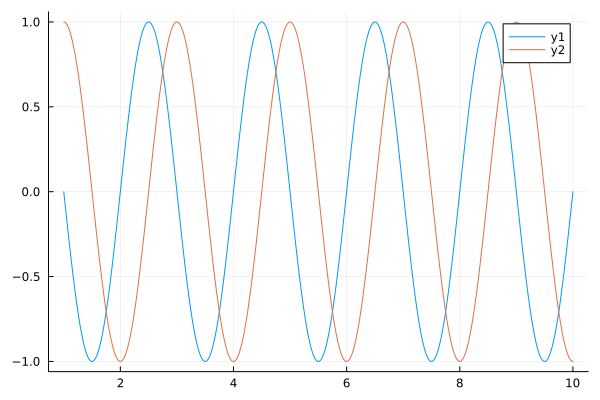

In [1168]:
t= 1:0.01:10
plot(t, sin.(pi*t))
plot!(t, sin.(pi*(t.-0.5)))

In [1169]:
params

22-element Vector{Any}:
     Float32[0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4  …  0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]
     Float32[0.0 0.0045 … 0.0045 0.0045; 0.0045 0.0 … 0.0045 0.0045; … ; 0.0045 0.0045 … 0.0 0.0045; 0.0045 0.0045 … 0.0045 0.0]
     Int16[0 1 … 1 1; 1 0 … 1 1; … ; 1 1 … 0 1; 1 1 … 1 0]
     Float32[0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011  …  0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011]
     Int16[1, 1, 5, 1, 1, 1, 1, 5, 5, 5  …  5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
    0.14285715f0
    0.14285715f0
    0.45f0
    0.95f0
   80.0f0
    0.0055555557f0
    0.8f0
    0.5f0
    0.5f0
    0.02528f0
 true
   10.0f0
 0x4b
    0.0059932224f0
   20.0f0
 0x00
 2000.0f0

In [1395]:
function asf_model_one(out,u,p,t)
    #ASF model for a single population (can make some speed increases) without farms!

    β_i, β_o, β_b, μ_p, K, ζ, γ, ω, ρ, λ, κ, σ, θ, η, g, Seasonal, bw, bo, k, la, lo, Area    = p 
    ref_density = 1 #baseline density (from Baltics where modelled was fitted)
    offset = -90 #seeding in the summer!
    year = 365 #days in a year

    u[u.<0] .= 0
    
    S = Vector{UInt8}(u[1:5:end])
    E = Vector{UInt8}(u[2:5:end])
    I = Vector{UInt8}(u[3:5:end])
    R = Vector{UInt8}(u[4:5:end])
    C = Vector{UInt8}(u[5:5:end])

    N = S .+ E .+ I .+ R .+ C
    Np = S .+ E .+ I .+ R
    
    N[N .== 0] .= 1
    
    tg = length(Np) #total groups in all populations
    tp = sum(Np) # total living pigs

    Density = sqrt((tp/Area)/ref_density) #density of population for beta
    connected_pops = β_b * Np
    #Deaths = μ_p.*(σ .+ ((1-σ)-0.05).*Np.^θ.*K.^(-θ))
    Deaths = μ_p.*(σ .+ ((1-σ)-g).*sqrt.(Np)./sqrt.(K))
    if Seasonal #running with seasons

        Lambda = λ + la * cos((t + offse + lo) * 2*pi/year)

        p_mag = birth_pulse_vector(t+offse,k,bw,bo)
        Births = p_mag.*(σ .* Np .+ ((1-σ)) .* sqrt.(Np .* K))#Np.^(1-θ) .* K.^θ)
        
        #now stopping boar births
        mask_boar = (K .== 1) .& (Np .> 0)
        boar_births = sum(mask_boar)
        Births[mask_boar] .= 0
        mask_p_s = (Np .> 1) .& (K .> 1)
        Births[mask_p_s] .+= p_mag*boar_births ./ sum(mask_p_s) 

        if  p_mag > 0.5*mean(μ_p)
            mask_em =  (Np .> 3) .& (K .> 1)
            mask_im = (Np .== 0) .& (connected_pops .> 1) #population zero but connected groups have 3 or more pigs
            extra_b = sum(Births[mask_im] .= 4*p_mag)
            Births[mask_em] .-= extra_b ./ sum(mask_p_s)
        end
    else

        Lambda = λ

        Births = μ_p.*(σ .* Np .+ (1-σ) .* Np.^(1-θ) .* K.^θ)

        mask_boar = (K .== 1) .& (Np .> 0)
        boar_births = sum(mask_boar)
        Births[mask_boar] .= 0
        mask_p_s = (Np .> 1) .& (K .> 1)
        Births[mask_p_s] .+= μ_p*boar_births ./ sum(mask_p_s) 

        #Immigration births (only happens around pulse time with the influx of births)
        mask_em =  (Np .> 3) .& (K .> 1)
        mask_im = (Np .== 0) .& (connected_pops .> 1)
        extra_b = sum(Births[mask_im] .= 4*μ_p)
        Births[mask_em] .-= extra_b ./ sum(mask_p_s)
        
    end

    #populations = N.*β_b + (N.*β_b)'
    v = ones(Int8,tg)
        
    populations  = v*N'+ N*v'

    out[1:11:end] .= Births
    out[2:11:end] .= S.*Deaths
    out[3:11:end] .=  (((Density .* β_o .* S) ./ populations)*(I .+ ω .* C)).+ β_i .* (S ./ N) .* (I .+ ω .* C)
    out[4:11:end] .= E.*Deaths
    out[5:11:end] .= ζ .* E
    out[6:11:end] .= ρ .* γ .* I 
    out[7:11:end] .= I.*Deaths
    out[8:11:end] .= γ .* (1 .- ρ) .* I
    out[9:11:end] .= R.*Deaths
    out[10:11:end].= (1 ./ Lambda) .* C
    out[11:11:end] .= κ .* R 


    nothing
end

asf_model_one (generic function with 1 method)

In [1396]:
function birth_pulse_vector(t,k,s,p)
    return k*exp(-s*cos(pi*(t+p)/365)^2)
end
function birth_pulse(t,k,s,p)
    return k.*exp.(-s.*cos.(pi.*(t.+p)./365).^2)
end

birth_pulse (generic function with 1 method)

In [997]:
rj_burn = RegularJump(asf_model_pop, regular_c, eqs*nt)
prob_burn = DiscreteProblem(U0,(0.0,60),params)
jump_prob_burn = JumpProblem(prob_burn, Direct(), rj)
sol_burn = solve(jump_prob_burn, SimpleTauLeaping(),dt=1)


retcode: Default
Interpolation: Piecewise constant interpolation
t: 0.0:1.0:60.0
u: 61-element Vector{Vector{Int16}}:
 [5, 0, 0, 0, 0, 5, 0, 0, 0, 0  …  5, 0, 0, 0, 0, 5, 0, 0, 0, 0]
 [5, 0, 0, 0, 0, 5, 0, 0, 0, 0  …  5, 0, 0, 0, 0, 5, 0, 0, 0, 0]
 [5, 0, 0, 0, 0, 5, 0, 0, 0, 0  …  5, 0, 0, 0, 0, 5, 0, 0, 0, 0]
 [5, 0, 0, 0, 0, 5, 0, 0, 0, 0  …  5, 0, 0, 0, 0, 5, 0, 0, 0, 0]
 [5, 0, 0, 0, 0, 5, 0, 0, 0, 0  …  5, 0, 0, 0, 0, 5, 0, 0, 0, 0]
 [5, 0, 0, 0, 0, 5, 0, 0, 0, 0  …  5, 0, 0, 0, 0, 5, 0, 0, 0, 0]
 [5, 0, 0, 0, 0, 4, 0, 0, 0, 0  …  5, 0, 0, 0, 0, 5, 0, 0, 0, 0]
 [5, 0, 0, 0, 0, 4, 0, 0, 0, 0  …  5, 0, 0, 0, 0, 5, 0, 0, 0, 0]
 [5, 0, 0, 0, 0, 4, 0, 0, 0, 0  …  5, 0, 0, 0, 0, 5, 0, 0, 0, 0]
 [5, 0, 0, 0, 0, 4, 0, 0, 0, 0  …  5, 0, 0, 0, 0, 5, 0, 0, 0, 0]
 [5, 0, 0, 0, 0, 4, 0, 0, 0, 0  …  5, 0, 0, 0, 0, 5, 0, 0, 0, 0]
 [5, 0, 0, 0, 0, 4, 0, 0, 0, 0  …  5, 0, 0, 0, 0, 5, 0, 0, 0, 0]
 [5, 0, 0, 0, 0, 4, 0, 0, 0, 0  …  5, 0, 0, 0, 0, 5, 0, 0, 0, 0]
 ⋮
 [5, 0, 0, 0, 0, 4, 0, 0, 0, 0  … 

In [1403]:
function asf_model_pop(out,u,p,t)
    #ASF model for a single population (can make some speed increases) without farms!

    β_i, β_o, β_b, μ_p, K, ζ, γ, ω, ρ, λ, κ, σ, θ, η, g, Seasonal, bw, bo, k, la, lo, Area  = p 
    
    offset = 0 #seeding in the summer!
    year = 365 #days in a year

    u[u.<0] .= 0
    
    S = Vector{UInt32}(u[1:5:end])
    
    connected_pops = β_b * S
    
    p_mag = birth_pulse_vector(t,k,bw,0)
    Births = p_mag.*(σ .* S .+ ((1-σ)) .* sqrt.(S.*K))
        
   
    
     #now stopping boar births
    mask_boar = (K .== 1) .& (S .> 0)
    boar_births = sum(mask_boar)
    Births[mask_boar] .= 0
    mask_p_s = (S .> 1) .& (K .> 1)
    Births[mask_p_s] .+= p_mag*boar_births ./ sum(mask_p_s) 

        
        #now stopping boar births
    if  p_mag > 0.5*mean(μ_p)
        mask_em =  (S .> 3) .& (K .> 1)
        mask_im = (S .== 0) .& (connected_pops .> 1) #population zero but connected groups have 3 or more pigs
        extra_b = sum(Births[mask_im] .= 4*p_mag)
        Births[mask_em] .-= extra_b ./ sum(mask_p_s)
    end
    
    out[1:11:end] .= Births
    out[2:11:end] .= S.*μ_p.*(σ .+ ((1-σ)-g).*sqrt.(S./K))
   
    nothing
end

asf_model_pop (generic function with 1 method)

In [1387]:
input = ASF_Inputs.Model_Data(input_path);
    
params = ASF_Model.convert(input.Parameters);

 

In [1398]:
U0 = input.U0

Burn_U0 =  copy(U0)
#Burn_U0[1:5:end] .+= (Burn_U0[2:5:end] .+ Burn_U0[3:5:end])
Burn_U0[2:5:end] .= 0
Burn_U0[3:5:end] .= 0
offse = 0
rj_burn = RegularJump(asf_model_pop, regular_c, eqs*nt)
prob_burn = DiscreteProblem(Burn_U0,(0.0,480),params)
jump_prob_burn = JumpProblem(prob_burn, Direct(), rj_burn)
sol_burn = solve(jump_prob_burn, SimpleTauLeaping(),dt=1);




In [1399]:
offse = 180
n_runs = 3

#U_burn = copy(sol_burn[75+offse]);
#U_burn[2:5:end] = U0[2:5:end]; 
#U_burn[3:5:end] = U0[3:5:end];

U_burn = copy(sol_burn[75+offse]);
#U_burn[2:5:end] = U0[2:5:end]; 
#U_burn[3:5:end] = U0[3:5:end];
rr = rand(1:nt)
if U_burn[rr*5+1] > 1
    U_burn[rr*5+1] = 0
    U_burn[rr*5+2] = 3
    U_burn[rr*5+3] = 2
else
    U_burn[rr*5+1] = 0
    U_burn[rr*5+3] = 1
end

netw = params[3][:,rr]
cons = findall(>(0), netw)
wanted=shuffle(cons)[1:4]

for i in cons
    if U_burn[i*5+1] > 1
        U_burn[i*5+1] = 0
        U_burn[i*5+2] = 3
        U_burn[i*5+3] = 2
    else
        U_burn[i*5+1] = 0
        U_burn[i*5+3] = 1
    end

end



In [1400]:
rj = RegularJump(asf_model_one, regular_c, eqs*nt)
prob = DiscreteProblem(U_burn,(0.0,10*365),params)
jump_prob = JumpProblem(prob,Direct(),rj)

#solo = solve(jump_prob, SimpleTauLeaping(),dt=1)    
ensemble_prob_m = EnsembleProblem(jump_prob)
outputs = solve(ensemble_prob_m, SimpleTauLeaping(), trajectories= n_runs,EnsembleThreads(),dt=1);

0
0
117
4.178091876147015
84
1.2126448360204787


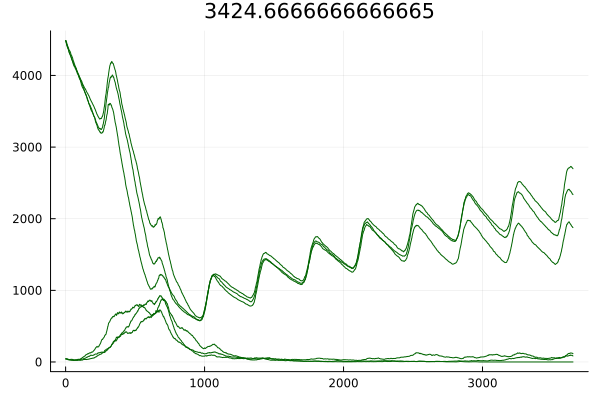

In [1402]:
mm = 0
plot()
for j in 1:n_runs
   data = outputs[j]
    disease_sum, disease_alive_sum, disease_free_sum, population_sum  = run_analysis(data);
    mm += sum(disease_sum .> 0)/n_runs

    
    plot!(population_sum, color = cc, label = "",  c = "DarkGreen")
    plot!(disease_sum,  color = cc, label = "",  c = "DarkGreen")
    println(disease_sum[end])
    if disease_sum[end] >0
    println(100*mean(disease_sum[5*365:end]./population_sum[5*365:end]))
    else 
    println(0)
    end
end
plot!(title = "$(mm)")

0
0.17121411147398172
117
4.178091876147015
84
1.2126448360204787


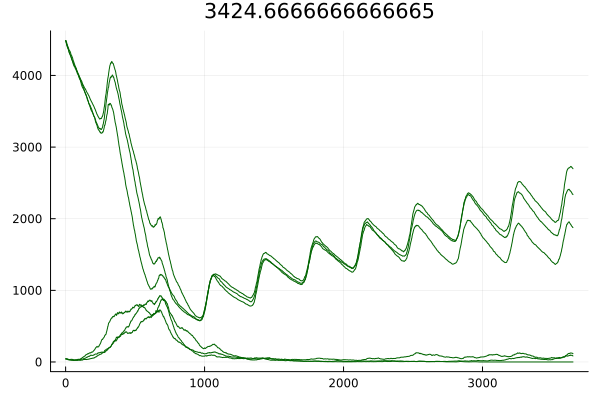

In [1401]:
mm = 0
plot()
for j in 1:n_runs
   data = outputs[j]
    disease_sum, disease_alive_sum, disease_free_sum, population_sum  = run_analysis(data);
    mm += sum(disease_sum .> 0)/n_runs

    
    plot!(population_sum, color = cc, label = "",  c = "DarkGreen")
    plot!(disease_sum,  color = cc, label = "",  c = "DarkGreen")
    println(disease_sum[end])
    println(100*mean(disease_sum[5*365:end]./population_sum[5*365:end]))
end
plot!(title = "$(mm)")

In [1361]:
max(disease_sum)

LoadError: MethodError: no method matching max(::Matrix{Int64})
[0mClosest candidates are:
[0m  max(::Any, [91m::Union{InitialValues.NonspecificInitialValue, InitialValues.SpecificInitialValue{typeof(max)}}[39m) at ~/.julia/packages/InitialValues/OWP8V/src/InitialValues.jl:161
[0m  max(::Any, [91m::Missing[39m) at missing.jl:137
[0m  max(::Any, [91m::Any[39m) at operators.jl:480
[0m  ...

75
62
0
80
30
88
154
0
126
76


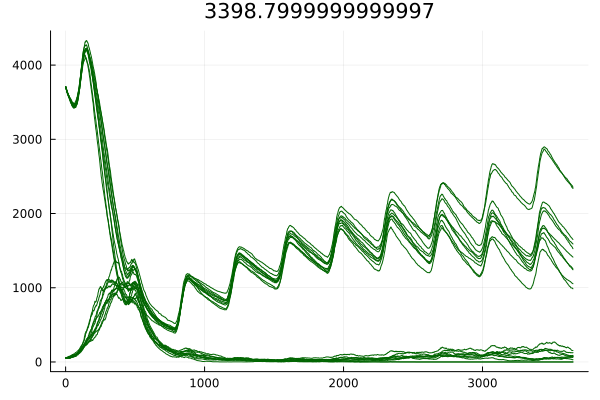

In [1355]:
mm = 0
plot()
for j in 1:n_runs
   data = outputs[j]
    disease_sum, disease_alive_sum, disease_free_sum, population_sum  = run_analysis(data);
    mm += sum(disease_sum .> 0)/n_runs

    
    plot!(population_sum, color = cc, label = "",  c = "DarkGreen")
    plot!(disease_sum,  color = cc, label = "",  c = "DarkGreen")
    println(disease_sum[end]) 
end
plot!(title = "$(mm)")

0
0
0
0
0
0
0
0
0
0


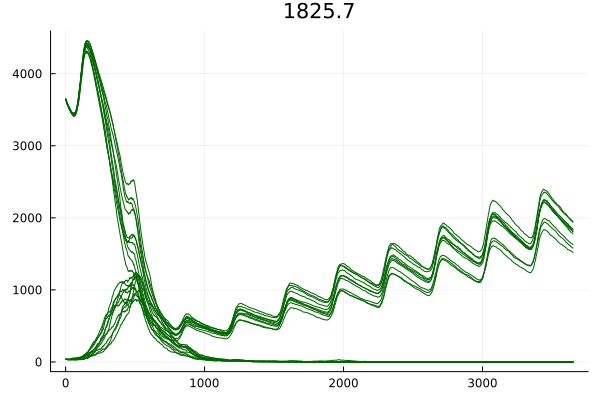

In [1339]:
mm = 0
plot()
for j in 1:n_runs
   data = outputs[j]
    disease_sum, disease_alive_sum, disease_free_sum, population_sum  = run_analysis(data);
    mm += sum(disease_sum .> 0)/n_runs

    
    plot!(population_sum, color = cc, label = "",  c = "DarkGreen")
    plot!(disease_sum,  color = cc, label = "",  c = "DarkGreen")
    println(disease_sum[end]) 
end
plot!(title = "$(mm)")

In [1340]:
sampled = outputs[1]
sampled = reduce(vcat,transpose.(sampled.u))

3651×5000 Matrix{Int16}:
 4  0  0  0  0  5  0  0  0  0  4  0  0  …  0  0  4  0  0  0  0  5  0  0  0  0
 4  0  0  0  0  5  0  0  0  0  4  0  0     0  0  4  0  0  0  0  5  0  0  0  0
 4  0  0  0  0  5  0  0  0  0  4  0  0     0  0  4  0  0  0  0  5  0  0  0  0
 4  0  0  0  0  5  0  0  0  0  4  0  0     0  0  4  0  0  0  0  5  0  0  0  0
 4  0  0  0  0  5  0  0  0  0  4  0  0     0  0  4  0  0  0  0  5  0  0  0  0
 4  0  0  0  0  5  0  0  0  0  4  0  0  …  0  0  4  0  0  0  0  5  0  0  0  0
 4  0  0  0  0  5  0  0  0  0  4  0  0     0  0  4  0  0  0  0  5  0  0  0  0
 4  0  0  0  0  5  0  0  0  0  4  0  0     0  0  4  0  0  0  0  5  0  0  0  0
 4  0  0  0  0  5  0  0  0  0  4  0  0     0  0  4  0  0  0  0  5  0  0  0  0
 4  0  0  0  0  5  0  0  0  0  4  0  0     0  0  4  0  0  0  0  5  0  0  0  0
 4  0  0  0  0  5  0  0  0  0  4  0  0  …  0  0  4  0  0  0  0  5  0  0  0  0
 4  0  0  0  0  5  0  0  0  0  4  0  0     0  0  4  0  0  0  0  5  0  0  0  0
 4  0  0  0  0  5  0  0  0  0  4  0  0 

0 : 1553.1
45 : 1445.2999999999997
90 : 1476.8999999999999
135 : 1592.1999999999998
180 : 1628.1
225 : 1557.6
270 : 1618.1999999999996
315 : 1548.2


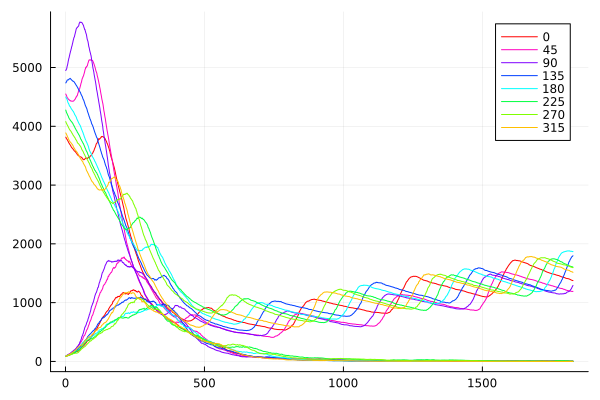

In [946]:
vals = [0,45,90,135,180,225,270,315]

n_runs = 10
plot()

for (i, val) in enumerate(vals)
    offse = val
    
    U_burn = copy(sol_burn[75+offse]);
    U_burn[2:5:end] = U0[2:5:end]; 
    U_burn[3:5:end] = U0[3:5:end];
    
    rj = RegularJump(asf_model_one, regular_c, eqs*nt)
    prob = DiscreteProblem(U_burn,(0.0,5*365),params)
    jump_prob = JumpProblem(prob,Direct(),rj)
    
    #solo = solve(jump_prob, SimpleTauLeaping(),dt=1)    
    ensemble_prob_m = EnsembleProblem(jump_prob)
    outputs = solve(ensemble_prob_m, SimpleTauLeaping(), trajectories= n_runs,EnsembleThreads(),dt=1);
    mm = 0
    for j in 1:n_runs
       data = outputs[j]
        disease_sum, disease_alive_sum, disease_free_sum, population_sum  = run_analysis(data);
        mm += sum(disease_sum .> 0)/n_runs
         
        if j == n_runs
            plot!(population_sum, color = cc, label = "$(offse)",  c = colours[i])
            plot!(disease_sum,  color = cc, label = "",  c = colours[i])
            println(offse, " : ", mm)
        end
    end
    
    
end
plot!()

In [931]:
using Colors

In [936]:
range(colorant"red", stop=colorant"green", length=8)

In [1253]:
colours = range(HSV(0,1,1), stop=HSV(-360,1,1), length=20) # inverse rotation

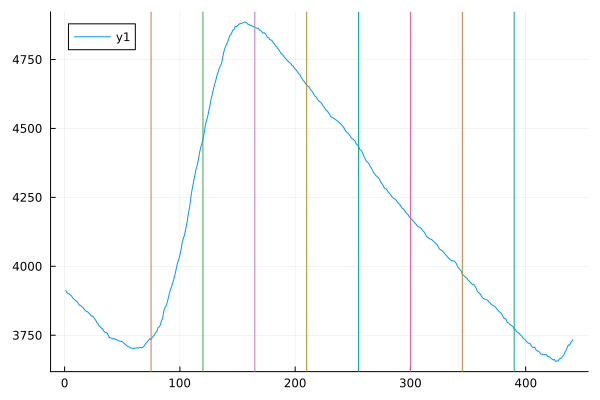

In [864]:
plot(run_analysis(sol_burn)[4])
off = 75
for i in [0,45,90,135,180,225,270,315]
    vline!([off+i], label = "" )
end
plot!()

### Fitting Population

In [1430]:
AUSF_pop = function(params,Tspan, U0)
    #function that runs model for fitting

    rj = RegularJump(asf_model_pop, regular_c, eqs*nt)

    prob = DiscreteProblem(U0,Tspan,params)

    jump_prob = JumpProblem(prob,Direct(),rj)

    ensemble_prob_m = EnsembleProblem(jump_prob)

    outputs = solve(ensemble_prob_m, SimpleTauLeaping(), trajectories= n_runs,EnsembleThreads(),dt=1);

    res = eval_out_pop(outputs,U0)

    return res
end
    

function simulator_function_pop(var_params)

   
    input = ASF_Inputs.Model_Data(input_path);

    U0 = copy(input.U0);
    U0[1:5:end] += (U0[2:5:end] +U0[3:5:end]) #setting init pop to zero
    U0[2:5:end] .= 0
    U0[3:5:end] .= 0;
    
    params = ASF_Model.convert(input.Parameters)
    
    params[15] = var_params[1] #corpse decay rates
    
    Time = (0.0,n_years*365)
    #now we run simulation!
    AUSF_pop(params, Time, U0)
end

function eval_out_pop(output, U0)
    output_final = Matrix{Float64}(undef,(n_years*365+1,1))
    dist = zeros(Float64,n_runs)
    K = sum(U0)
   dummy = zeros(n_years*365+1)
    
    for i = 1:n_runs
        sol = output[i]
        data = reduce(vcat,transpose.(sol.u))
        data[data .< 0 ] .= 0

        s_d = data[:,1:5:end]
        
        pop_sum = sum(s_d,dims=2)[:,1]
        
        pop_crop = pop_sum./ode_norm
 
        dummy += pop_crop/n_runs
        
    
    end
    output_final[:] = dummy
    dist = euclidean(obs[:],dummy)
    if dist < threshold
        println(1)
    
    end
    return output_final
    
end

function observed_params()
   
    obs =  Matrix{Float64}(undef,(n_years*365+1,1))
    
    obs .= 1
    
    return obs
end

observed_params (generic function with 1 method)

In [1431]:
ode_norm

3651×1 Matrix{Float64}:
 4000.0
 3995.6037482567017
 3991.212812499918
 3986.8271871211687
 3982.446866529808
 3978.0718451597577
 3973.702117476319
 3969.337677983127
 3964.978521229271
 3960.624641816483
 3956.276034407256
 3951.932693732347
 3947.594614599003
    ⋮
 4045.0764531708382
 4040.6257582560315
 4036.1804342540127
 4031.7404758305697
 4027.3058775883865
 4022.8766340757206
 4018.4527397947654
 4014.034189209738
 4009.6209767547903
 4005.213096841931
 4000.810543868202
 3996.4133122181306

In [1432]:
#Need to figure out the norm
#Need to figure out the norm
input = ASF_Inputs.Model_Data(input_path);

U0_ode = [sum(input.U0)];
p_ode = [input.Parameters.k[1], input.Parameters.bw[1],input.Parameters.σ[1],sum(input.Parameters.K),input.Parameters.μ_p[1]];
tspan_ode = (0.0,10*365.0);

In [1433]:
function density_carrying!(du,u,p,t)
    S = u[1]
    k, bw, σ, K, μ_p = p
   
    du[1] = birth_pulse_vector(t,k,bw,0).*(σ .* S .+ ((1-σ)) .* sqrt.(S.*K))-S.*μ_p.*(σ .+ ((1-σ)).*sqrt.(S./K))

end

density_carrying! (generic function with 1 method)

In [1434]:
prob_ode = ODEProblem(density_carrying!, [4000], (0.0,10*365.0), p_ode)
sol_ode = solve(prob_ode, saveat = 1,reltol=1e-8);
ode_norm = reduce(vcat,transpose.(sol_ode.u));

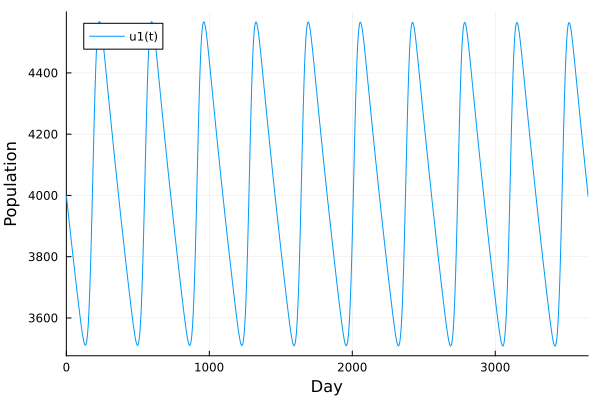

In [1435]:
plot(sol_ode, ylabel = "Population", xlabel = "Day")
#hline!([4200], label = "")
#vline!([365/2-60], color = "Black", label = "")

In [1436]:
#Some key parameters for G

input_path = "/home/callum/ASF/Inputs/"; #path to model data
n_years = 10 #how many years each sim will run for
n_runs = 3 #how many runs for each param
obs = observed_params() #our observed (just array of ones, we normalise output to be relative to this)
priors = [Uniform(0, 0.1)];

In [1437]:
#Our params for fitting
n_particles = 100 #number of acceptances we want
devi = 0.99 #how close (from 0-1 with 1 being identical) do we want output to be to observed, used for threshold
threshold = sqrt((n_years*365+1)*((1-devi)^2));

In [ ]:
sim_result = SimulatedABCRejection(obs, simulator_function_pop, priors, threshold, n_particles; max_iter=10000, write_progress=false)#,

1
1
1


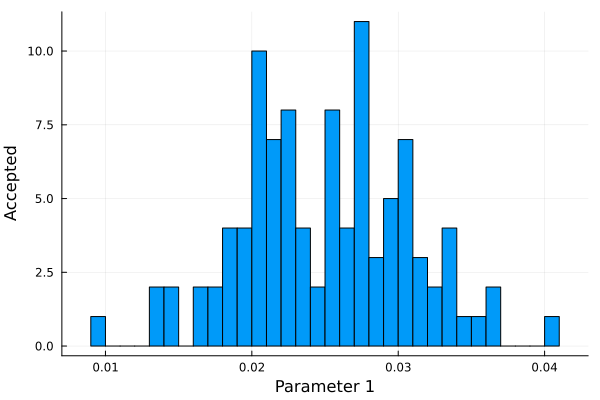

In [46]:
plot(sim_result)

In [47]:
median(sim_result.population)

0.02528345260464895

In [57]:
plot(sol)

LoadError: InterruptException:

### Fitting ASF

Here we are fitting the diease dynamics to previously observed effects from outbreaks in the Baltic States

In [296]:
sum((input.U0[2:5:end] .>=1) .| (input.U0[3:5:end] .>=1))

10

In [303]:
E = input.U0[2:5:end]
I = input.U0[3:5:end];

E[E .> 0]


8-element Vector{Int16}:
 3
 3
 3
 3
 3
 3
 3
 3

In [306]:
sum(I[I .> 0])+sum(E[E .> 0])

42

2


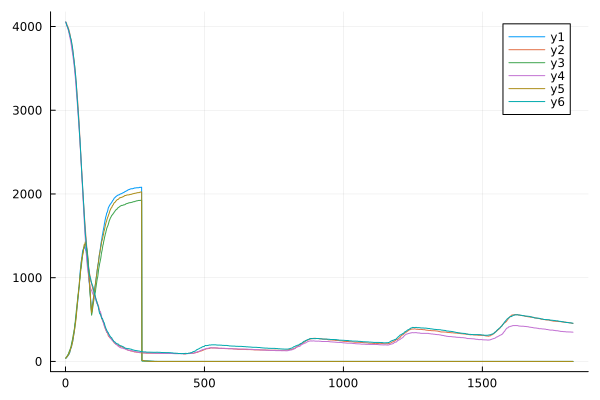

In [362]:
plot()
simulator_function_d([0.1,0.5,0.5])
plot!()

In [358]:
function AUSF_d(dis_params,Tspan,U0)
    rj = RegularJump(asf_model_one, regular_c, eqs*nt)
    prob = DiscreteProblem(U0,Tspan,dis_params)
    jump_prob = JumpProblem(prob,Direct(),rj)
    ensemble_prob = EnsembleProblem(jump_prob)
    model_outs = solve(ensemble_prob, SimpleTauLeaping(), trajectories= n_runs,EnsembleThreads(),dt=1)
    res = eval_out(model_outs)
end
    
function simulator_function_d(var_params)
    Tspan = (0.0,365*n_years)
    
    input = ASF_Inputs.Model_Data(input_path);
    
    params = ASF_Model.convert(input.Parameters)
    
    U0 = input.U0
    
    Burn_U0 =  copy(U0)
    Burn_U0[2:5:end] .= 0
    Burn_U0[3:5:end] .= 0
    
    rj_burn = RegularJump(asf_model_pop, regular_c, eqs*nt)
    prob_burn = DiscreteProblem(Burn_U0,(0.0,params[18]*1.0),params)
    jump_prob_burn = JumpProblem(prob_burn, Direct(), rj)
    sol_burn = solve(jump_prob_burn, SimpleTauLeaping(),dt=1)
    
    U_burn = sol_burn[end]
    U_burn[2:5:end] = U0[2:5:end] 
    U_burn[3:5:end] = U0[3:5:end] 
    #beta
    
    params[1] .= var_params[1] #intra
    params[2][params[2] .!= 0 ] .= var_params[2]/n_con #inter
    
    #corpse 
    params[10] = var_params[3] #corpse infection modifier
    
    AUSF_d(params, Tspan, U_burn)
end

function eval_out(data) 

    output_final = Matrix{Float64}(undef,(3,1))
    s = 0
    ep = 0
    mt = 0
    pd = 0
    
    for i in 1:n_runs
        d, da,f,p = run_analysis(data[i])
        plot!(d)
        plot!(f)
        if d[end] > 0

            ep += 100*mean(da[3*365:end])/mean(p[3*365:end])
            pd += 100*(1-mean(p[3*365:end])/p[1])
            mt += maximum(findall(==(maximum(d)), d))[1]


            s += 1
        end

    end
    
    
    if s >= 2
        output_final[1] = ep/s*(1/2)
        output_final[2] = pd/s*(1/10)
        output_final[3] = mt/s*(2/365)
        
    else
        output_final[1] = 0
        output_final[2] = 0
        output_final[3] = 0
    end
    
    d= euclidean(output_final,obs)
    if d < threshold
        println(d)
    else 
        println(2)
    end

    return output_final
    
end

function observed_params()
   
    obs =  Matrix{Float64}(undef,(3,1))
    
    obs[1] = 1 #2 #endemic prev
    obs[2] = 8#80 #population delcine %
    obs[3] = 2#180 #time (days) from init to max
    
    return obs
end

observed_params (generic function with 1 method)

In [356]:
input_path = "/home/callum/ASF/Inputs/"; #path to model data
n_years = 5 #how many years each sim will run for
n_runs = 3 #how many runs for each param
n_con = 8  # average number of connections each group has
obs = observed_params() #our observed (just array of ones, we normalise output to be relative to this)
priors = [Uniform(0.15, 0.85), Uniform(0.015, 0.085), Uniform(0.15, 1)];

In [350]:
n_particles = 100;
threshold_schedule = [1.0, 0.8, 0.7];

In [351]:
sim_abcsmc_res = SimulatedABCSMC(obs,simulator_function_d,priors,threshold_schedule,n_particles; write_progress=false)

LoadError: MethodError: no method matching *(::Vector{Float32}, ::Vector{Float32})
[0mClosest candidates are:
[0m  *(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:591
[0m  *([91m::StridedMatrix{T}[39m, ::StridedVector{S}) where {T<:Union{Float32, Float64, ComplexF32, ComplexF64}, S<:Real} at /opt/julia-1.8.3/share/julia/stdlib/v1.8/LinearAlgebra/src/matmul.jl:49
[0m  *(::StridedVecOrMat, [91m::Adjoint{<:Any, <:LinearAlgebra.LQPackedQ}[39m) at /opt/julia-1.8.3/share/julia/stdlib/v1.8/LinearAlgebra/src/lq.jl:269
[0m  ...